In [205]:
### ml
## 기본 패키지
import numpy  as np
import pandas as pd
import sklearn
print('numpy  version - ' , np.__version__) 
print('pandas version - ' , pd.__version__) 
print('sklearn version - ' , sklearn.__version__)

## 데이터셋
import seaborn as sns
from   sklearn.datasets import load_iris, load_breast_cancer, make_blobs

## 전처리
from sklearn.impute import SimpleImputer
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from io import StringIO

# 문턱을 이용한 처리
from sklearn.preprocessing import Binarizer

# 결측치 시각화
import missingno as msno

### 모델
## 지도학습
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier

## 평가지표
# 분류
from sklearn.metrics         import accuracy_score 
from sklearn.metrics         import recall_score, precision_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve

# 예측
from sklearn.metrics         import mean_squared_error, mean_absolute_error

## 비지도학습
from sklearn.cluster import KMeans

# 차원 축소
from sklearn.decomposition import PCA

## 시각화
import matplotlib.pyplot as plt
%matplotlib inline

# 지도
import folium



numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


#### cluster(군집화)
- 데이터 포인트들을 별개의 군집으로 그룹화화는 것을 의미함
- 유사성이 높은 데이터들을 동일한 그룹으로 분류하고 서로 다른 군집들이 상이성을 가지도록 하는 알고리즘
- 유클리드 계산법을 이용해 거리를 측정해 그룹화
- Kmeans는 feature가 많아질수록 데이터의 정확도가 떨어지게됨. 또한 이상치에도 영향을 받아 군집을 만들어버림

In [27]:
cluster_frm = pd.DataFrame(columns=('x', 'y'))

cluster_frm.loc[0] = [7, 1]
cluster_frm.loc[1] = [2, 1]
cluster_frm.loc[2] = [4, 2]
cluster_frm.loc[3] = [9, 4]
cluster_frm.loc[4] = [10, 5]
cluster_frm.loc[5] = [10, 6]
cluster_frm.loc[6] = [11, 5]
cluster_frm.loc[7] = [11, 6]
cluster_frm.loc[8] = [15, 3]
cluster_frm.loc[9] = [15, 2]
cluster_frm.loc[10] = [16, 6]
cluster_frm.loc[11] = [16, 1]

cluster_frm

,x,y
0,7,1
1,2,1
2,4,2
3,9,4
4,10,5
5,10,6
6,11,5
7,11,6
8,15,3
9,15,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


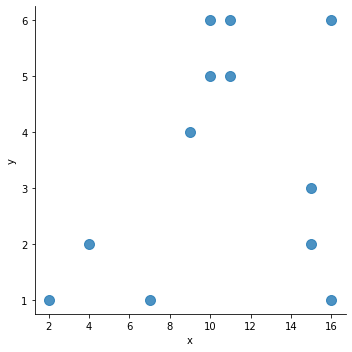

In [28]:
sns.lmplot('x', 'y',
           data = cluster_frm,
           fit_reg = False,
           scatter_kws = {'s' : 100}
          )

plt.show()
plt.close()

In [29]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(cluster_frm)

KMeans(n_clusters=3)

In [30]:
cluster_frm['clusterid'] = kmeans.labels_

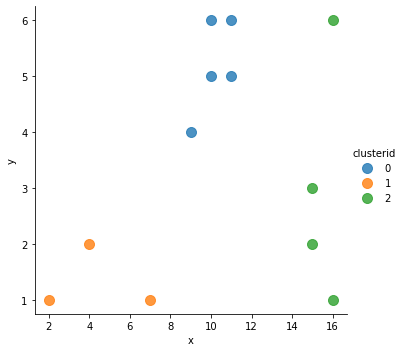

In [32]:
sns.lmplot('x', 'y',
           data = cluster_frm,
           fit_reg = False,
           scatter_kws = {'s' : 100},
           hue = 'clusterid'
          )

plt.show()
plt.close()

In [38]:
print('분리형 가상 데이터 생성 - ')

X, y = make_blobs(n_samples= 300,
                 n_features= 2,
                 centers=3,      ## 센트로이드, 클러스터 수
                 random_state= 100)  

분리형 가상 데이터 생성 - 


In [43]:
X.shape

(300, 2)

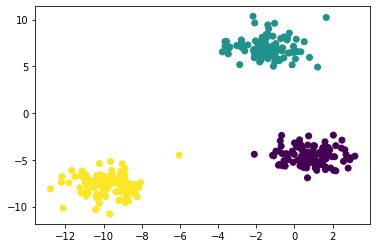

In [46]:
plt.scatter(X[:,0], X[:,1], marker='o', c=y)

plt.show()
plt.close()

In [53]:
feature, label = make_blobs(random_state=100)

In [54]:
feature.shape, label.shape

((100, 2), (100,))

In [55]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(feature)

KMeans(n_clusters=3)

In [56]:
kmeans.labels_

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0])

In [57]:
label

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0])

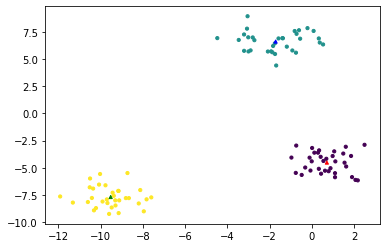

In [74]:
plt.scatter(feature[:,0], feature[:,1], marker='o', c= kmeans.labels_, s = 10)

kmeans.cluster_centers_

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^', c= ['r', 'b', 'g'], s = 10)



- iris clustering

In [114]:
iris = load_iris()

In [115]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [116]:
df_x = pd.DataFrame(iris.data, columns= iris.feature_names)


In [117]:
df_x.head(3)
df_x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [118]:
kmeans = KMeans(n_clusters= 3,
                verbose   = 1,
                init      = 'k-means++',
                max_iter  = 300)

kmeans.fit(df_x)

Initialization complete
Iteration 0, inertia 100.04000000000005
Iteration 1, inertia 79.0112853768422
Iteration 2, inertia 78.85566582597727
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 231.6
Iteration 1, inertia 143.65762601666017
Iteration 2, inertia 143.20254475505357
Iteration 3, inertia 142.9128981252265
Iteration 4, inertia 142.80495138888895
Iteration 5, inertia 142.77336161700464
Iteration 6, inertia 142.7540625000001
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 141.11
Iteration 1, inertia 97.70722408866938
Iteration 2, inertia 86.29439304485366
Iteration 3, inertia 79.86398439527464
Iteration 4, inertia 79.19714263977781
Iteration 5, inertia 78.851441426146
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 133.79000000000008
Iteration 1, inertia 81.79567343980543
Iteration 2, inertia 80.80637599999999
Iteration 3, inertia 79.87357983461304
Iterat

KMeans(n_clusters=3, verbose=1)

In [119]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [120]:
kmeans.predict(df_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [121]:
df_x['cid'] = kmeans.labels_         ## cid 는 그룹 아이디
df_x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [122]:
df_x['target'] = iris.target
df_x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,1,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [128]:
print('cid를 기준으로 sepal length의 빈도를 확인한다면? - ')

df_x.groupby(['cid', 'target'])['sepal length (cm)'].count()

cid를 기준으로 sepal length의 빈도를 확인한다면? - 


cid  target
0    0         50
1    1         48
     2         14
2    1          2
     2         36
Name: sepal length (cm), dtype: int64

#### 차원 축소(Principal Components Analysis)
- 고차원의 데이터를 저차원의 데이터로 축소시키는 방법
- 이유? 모든 피처가 결과에 영향을 미치는건 아니기 때문에
- 시각화를 위해서는 2차원의 그래프
- 이점? 시각화, 노이즈 제거, 메모리 절약, 모델의 성능을 개선

In [131]:
iris_pca = PCA(n_components = 2)

iris_pca_trans = iris_pca.fit_transform(iris.data)
iris_pca_trans

In [134]:
df_x['pca_x'] = iris_pca_trans[:, 0]
df_x['pca_y'] = iris_pca_trans[:, 1]

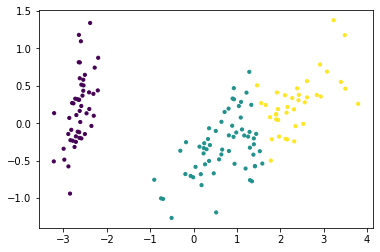

In [135]:
plt.scatter(df_x['pca_x'], df_x['pca_y'], marker='o', c= kmeans.labels_, s = 10)

In [136]:
print('차원축소 시 피처의 유닛이 다를경우 - 스케일링이 필요하다 \n')

차원축소 시 피처의 유닛이 다를경우 - 스케일링이 필요하다 



In [137]:
def feature_scaling(method='None', input_data=None):
    if method == 'standard':
        return StandardScaler().fit_transform(input_data)
    if method == 'minmax':
        return MinMaxScaler().fit_transform(input_data)

In [142]:
std_scaler =feature_scaling(method='standard', input_data= df_x.iloc[:, :4])

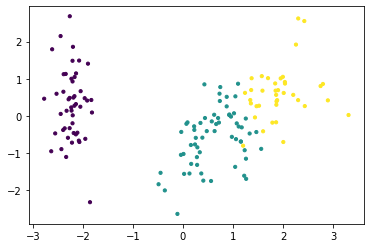

In [146]:
iris_pca = PCA(n_components = 2)

iris_pca_trans = iris_pca.fit_transform(std_scaler)
iris_pca_trans

df_x['pca_x'] = iris_pca_trans[:, 0]
df_x['pca_y'] = iris_pca_trans[:, 1]

plt.scatter(df_x['pca_x'], df_x['pca_y'], marker='o', c= kmeans.labels_, s = 10)



In [149]:
std_iris_kmeans = KMeans(n_clusters=3)
std_iris_kmeans.fit(df_x.iloc[:,-2:])

KMeans(n_clusters=3)

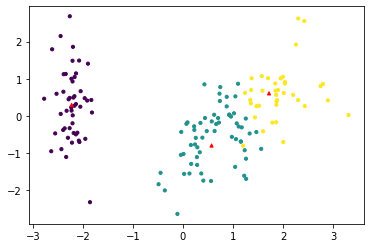

In [157]:
df_x.keys()
plt.scatter(df_x['pca_x'], df_x['pca_y'], marker='o', c= kmeans.labels_, s = 10)

# kmeans.cluster_centers_

plt.scatter(std_iris_kmeans.cluster_centers_[:,0], std_iris_kmeans.cluster_centers_[:,1], marker='^', c= ['r', 'r', 'r'], s = 10)



#### KMeans [실습]
-wholesale customers

In [163]:
df = pd.read_csv('./lecture_file/Wholesale customers data.csv')

# df.info()
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x173b99d1760>,
 'caps': [<matplotlib.lines.Line2D at 0x173b9576e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x173b6894310>,
 'medians': [<matplotlib.lines.Line2D at 0x173b95764f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x173b9e1aee0>,
 'means': []}

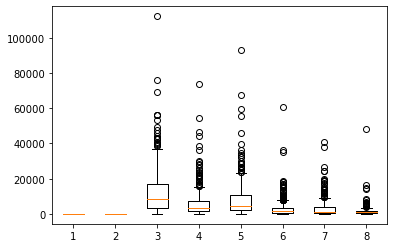

In [161]:
plt.boxplot(df)

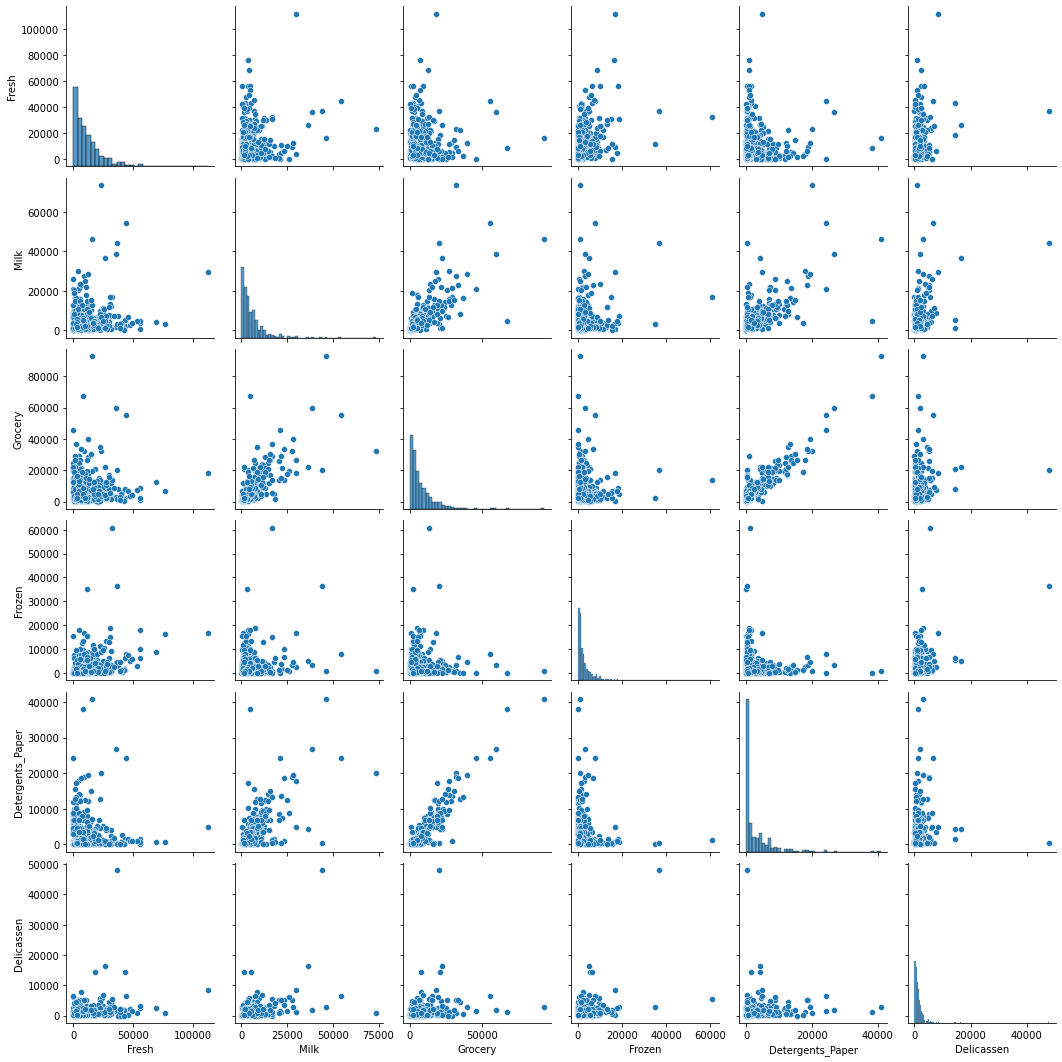

In [167]:
sns.pairplot(df.iloc[:, 2:])

In [194]:
pca_model = PCA(n_components=2)
pca_df = pca_model.fit_transform(df)

kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df)


KMeans(n_clusters=3)

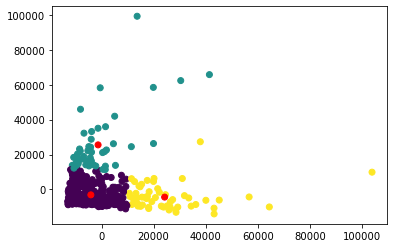

In [195]:
plt.scatter(pca_df[:,0], pca_df[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c=['r','r','r'])

### Practice
- 고등학교 진학률 데이터를 활용하여 속성이 비슷한 중학교끼리 클러스터
- 데이터 인코딩 필요
- 지도 시각화 필요(folium)

### 진행절차
#### step01. 데이터 전처리 - (지역, 코드 , 유형, 주야)
#### step02. 군집모형생성 - 분석에 사용할 피처는 과학고, 외고국제고, 자사고 진학률
#### step03. 표준화
#### step04. 모형 객체 생성
#### step05. 모형 학습
#### step06. 예측
#### step07. 예측 결과를 데이터 프레임에 추가
#### step08. 클러스터 값으로 그룹화, 그룹별 내용 출력
#### step09. 지도 그래프 시각화

In [233]:
# step01. 데이터 전처리 - (지역, 코드 , 유형, 주야)
df = pd.read_excel('./lecture_file/middle_shcool_graduates_report.xlsx')
df.keys()

Index(['Unnamed: 0', '지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고',
       '특성화고', '과학고', '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학', '취업',
       '미상', '위도', '경도'],
      dtype='object')

In [229]:
df.drop(columns='Unnamed: 0', inplace=True)

In [230]:
df.head(2)

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.0,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.0,37.577473,127.003857


In [234]:
lr_list = ['지역', '유형', '주야']
lr = LabelEncoder()
for i in lr_list:
    df[i] = lr.fit_transform(df[i])

df.head(3)

,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,...,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,0,16,서울대학교사범대학부설중학교,3,1,0,277,0,0.585,0.148,...,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,1,22,서울대학교사범대학부설여자중학교,3,1,0,0,256,0.680,0.199,...,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,2,0,개원중학교,3,0,0,170,152,0.817,0.047,...,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744


In [239]:
# step02. 군집모형생성 - 분석에 사용할 피처는 과학고, 외고국제고, 자사고 진학률
df_dataset = df.loc[:, ['과학고', '외고_국제고', '자사고']]
df_dataset.head(2)

,과학고,외고_국제고,자사고
0,0.018,0.007,0.227
1,0.000,0.035,0.043


In [241]:
# step03. 표준화
standization = StandardScaler()
std_data = standization.fit_transform(df_dataset)

In [250]:
# step04. 모형 객체 생성
pca =PCA(n_components=2)
kmeans = KMeans(n_clusters=3, random_state = 100)

In [251]:
# step05. 모형 학습
pca_data = pca.fit_transform(std_data)
kmeans.fit(pca_data)

KMeans(n_clusters=3, random_state=100)

In [252]:
# step06. 예측
pred_y = kmeans.predict(pca_data)

In [253]:
# step07. 예측 결과를 데이터 프레임에 추가
result_df = pd.DataFrame(pca_data)
result_df.head(2)

,0,1
0,1.985140,1.965548
1,0.330622,-1.979157


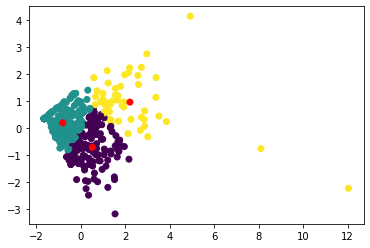

In [256]:
# step08. 클러스터 값으로 그룹화, 그룹별 내용 출력


plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans.labels_ )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c=['r', 'r', 'r'] )

In [257]:
pca_data

array([[ 1.98514011e+00,  1.96554782e+00],
       [ 3.30622168e-01, -1.97915681e+00],
       [ 3.97483595e-01,  4.12711201e-01],
       [ 6.11474120e-01,  4.19378497e-01],
       [ 1.56419417e+00,  1.45698662e+00],
       [ 1.19980926e-01,  7.65527454e-01],
       [ 3.85514451e+00,  2.36590364e-01],
       [ 2.97338343e+00,  2.73671310e+00],
       [ 2.12804948e+00, -2.11404855e-01],
       [ 1.06429030e+00, -7.83475170e-01],
       [ 3.37964582e+00,  1.12887411e+00],
       [ 9.94614098e-01, -4.19012652e-01],
       [ 1.72248532e+00, -8.11332730e-01],
       [-3.18391200e-01, -1.05949244e+00],
       [ 1.67888367e+00,  1.19241711e+00],
       [ 5.59922334e-01, -1.07467159e-01],
       [ 8.93700427e-01,  9.61047253e-01],
       [-5.06112251e-01, -2.68020367e-01],
       [ 1.86527312e+00,  8.35177428e-01],
       [ 2.87810660e+00,  6.29024250e-01],
       [-1.24174406e-01, -1.37769890e-03],
       [ 1.65493296e+00,  1.02947843e+00],
       [-4.14588524e-01, -8.09859834e-01],
       [ 3.

In [ ]:
# step09. 지도 그래프 시각화

In [235]:
school_map = folium.Map(location=[37.5, 126.9],
                       zoom_start=12,
                       tiles= ' Stamen Toner')

for name, lat, lng in zip(df['학교명'], df['위도'], df['경도']):
    folium.Marker([lat,lng],
                  popup = name,
                  icon  = folium.Icon(color= 'red')
                ).add_to(school_map)
    
school_map